<a href="https://colab.research.google.com/github/main-scientist/data_repository/blob/main/GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
from IPython.display import HTML
sns.set_style("ticks")

In [2]:
def Func(x):
  return x**4 + 5*x**3 - 10*x

def func(x):
  return 4*x**3 + 15*x**2 - 10

In [3]:
x = np.linspace(-5, 2, 1000)
y1 = Func(x)
y2 = func(x)

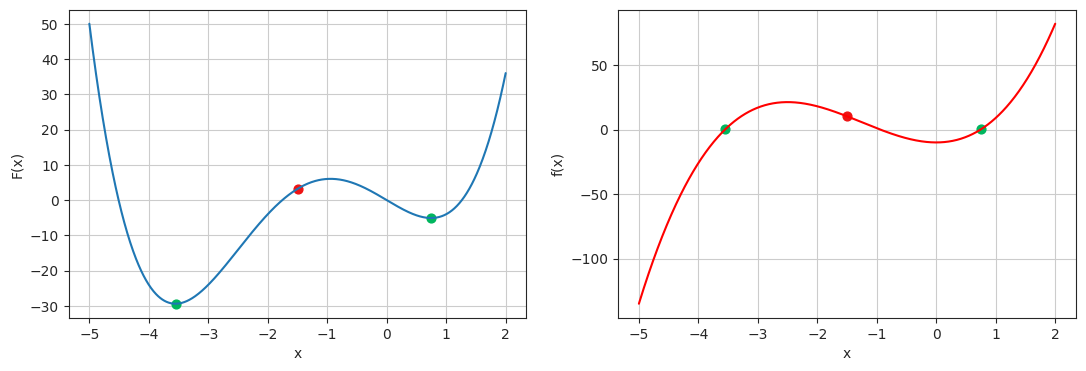

In [90]:
fig, ax = plt.subplots(ncols=2, figsize=(13, 4))

sns.lineplot(x=x, y=y1, ax=ax[0])
sns.lineplot(x=x, y=y2, ax=ax[1], color='r')

ax[0].grid(True)
ax[1].grid(True)

points = [0.75, -3.55]

for point in points:
  ax[0].scatter(point, Func(point), marker='o', s=40, color='#00B65E')
ax[0].scatter(-1.5, Func(-1.5), marker='o', s=40, color='#EE1313')
ax[0].set_xlabel('x')
ax[0].set_ylabel('F(x)')

for point in points:
  ax[1].scatter(point, func(point), marker='o', s=40, color='#00B65E')
ax[1].scatter(-1.5, func(-1.5), marker='o', s=40, color='#EE1313')
ax[1].set_xlabel('x')
ax[1].set_ylabel('f(x)')

plt.show()

In [94]:
def gradient_descent(w, alpha, iters):
  w_values = []
  w_values.append(w)
  print(f'w: {w}, Loss: {func(w)}')
  for _ in range(iters):
    grad = func(w)
    w = w - alpha * grad
    print(f'w: {w}, Loss: {func(w)}')
    w_values.append(w)
  return w_values

w_init = -1.5
alpha = 0.01
iters = 20

w_values = gradient_descent(w_init, alpha, iters)

w: -1.5, Loss: 10.25
w: -1.6025, Loss: 12.0591736875
w: -1.723091736875, Loss: 14.07192846024423
w: -1.8638110214774424, Loss: 16.208909143361602
w: -2.0259001129110583, Loss: 18.304694515468547
w: -2.208947058065744, Loss: 20.07794526677057
w: -2.40972651073345, Loss: 21.13070312105325
w: -2.6210335419439823, Loss: 21.023171087182448
w: -2.8312652528158067, Loss: 19.458542204247337
w: -3.02585067485828, Loss: 16.520585347729636
w: -3.1910565283355763, Loss: 12.766531714699909
w: -3.3187218454825755, Loss: 9.000243202065576
w: -3.4087242775032314, Loss: 5.861678158093781
w: -3.4673410590841693, Loss: 3.59301648202225
w: -3.5032712239043917, Loss: 2.1123195315378496
w: -3.52439441921977, Loss: 1.2093089578905278
w: -3.5364875087986753, Loss: 0.6813841875291189
w: -3.5433013506739663, Loss: 0.38039332216098387
w: -3.547105283895576, Loss: 0.21124947744999645
w: -3.549217778670076, Loss: 0.11697187438420542
w: -3.5503874974139182, Loss: 0.06466309618551236


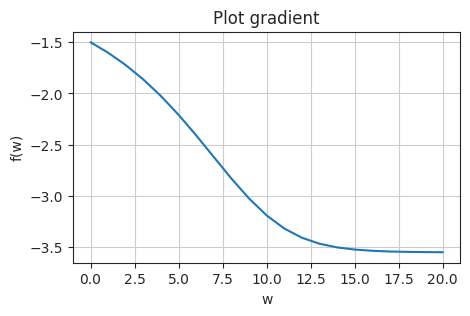

In [96]:
fig, ax = plt.subplots(figsize=(5, 3))
plt.plot(w_values)
ax.grid(True)
ax.set_xlabel('w')
ax.set_ylabel('f(w)')
ax.set_title('Plot gradient')

plt.show()

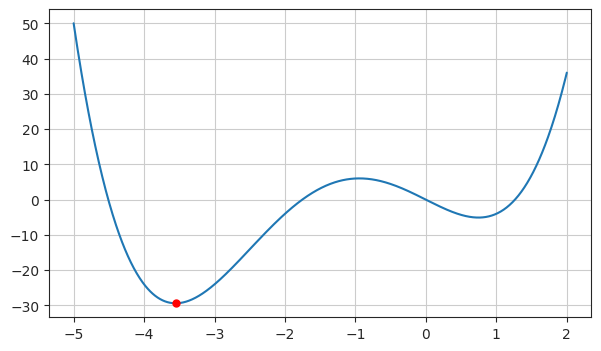

In [97]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.lineplot(x=x, y=y1, ax=ax)
ax.grid(True)

point, = ax.plot([], [], 'ro', ms=5)

def init():
    point.set_data([], [])
    return (point,)

def update(w):
    point.set_data([w], [Func(w)])
    return (point,)

ani = FuncAnimation(fig, update, frames=w_values, init_func=init, blit=True, interval=500)

HTML(ani.to_jshtml())